In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
from Simulacion import *

OPR102_001
OPR101_011
OPR102_003
OPR101_033
Paciente 14252611 ha llegado al hospital
Box 1 disponible
Fila : URG101_003,0
14252611 encontrado en box1
Paciente 14252611 ha salido de URG101_003a las 2017-08-25 16:50:00
Traslado hacia Outside:paciente n°14252611
Fila : Outside,0
Paciente 14252611 ha salido de Outsidea las 2017-08-25 17:46:00
Traslado hacia OPR102_003:paciente n°14252611
Fila : OPR102_003,0
14252611 encontrado en 1
Paciente 14252611 ha salido de OPR102_003a las 2017-08-25 18:31:00
Traslado hacia OPR101_033:paciente n°14252611
Fila : OPR101_033,0
14252611 encontrado en 1
Paciente 14252611 ha salido de OPR101_033a las 2017-08-25 18:32:00
Traslado hacia Outside:paciente n°14252611
Fila : Outside,0
Paciente 14252611 ha salido de Outsidea las 2017-08-28 09:56:00
Traslado hacia OPR102_003:paciente n°14252611
Fila : OPR102_003,0
14252611 encontrado en 1
Paciente 14252611 ha salido de OPR102_003a las 2017-08-28 12:10:00
Traslado hacia OPR101_033:paciente n°14252611
Fila : OPR101_0

In [3]:
datos_hospital = hospital.datos

In [4]:
import pandas as pd


In [5]:
df_hospital = pd.DataFrame(datos_hospital)
df_hospital = df_hospital.T

<AxesSubplot:>

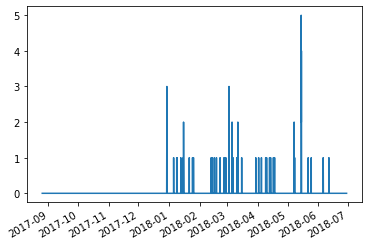

In [6]:
df_hospital["URG101_003_fila"].plot()

In [7]:
df_pacientes = pd.DataFrame(columns = ["case_id","area","timestamp"])

In [8]:
p = hospital.pacientes
i = 1
for pat in p :
    datos_paciente = p[pat].datos
    for dato in datos_paciente:
        key = list(dato.keys())[0]
        df_pacientes.loc[i] = {"case_id":pat,"area":key,"timestamp":dato[key]}
        i += 1

In [9]:
df_pacientes

,case_id,area,timestamp
1,14817280,URG101_003,2018-03-30 18:14:00
2,14817280,DIV101_703,2018-03-30 20:29:00
3,14817280,DIV103_204,2018-03-30 22:06:00
4,14817280,End,2018-03-30 22:06:00
5,14931970,URG101_003,2018-05-13 16:37:00
...,...,...,...
4323,14716925,End,2018-02-24 14:22:00
4324,14870527,URG101_003,2018-04-18 20:37:00
4325,14870527,DIV101_703,2018-04-18 20:51:00
4326,14870527,DIV104_602,2018-04-19 11:14:00


In [10]:
df_pacientes.columns = ["Case ID","Area","Marca de tiempo"]

In [11]:
datos_pacientes = df_pacientes

In [12]:
set_pacientes = set(datos_pacientes["Case ID"])
entrada = "URG101_003"
salida = "End"
dic_info_pacientes = dict.fromkeys(set_pacientes,{})
for paciente in set_pacientes:
    info_paciente = datos_pacientes[datos_pacientes["Case ID"] == paciente]
    hora_entrada = info_paciente.iloc[0]["Marca de tiempo"]
    hora_salida = info_paciente.iloc[-1]["Marca de tiempo"]
    dic_paciente ={"Entrada":hora_entrada,"Salida":hora_salida}
    duracion = hora_salida - hora_entrada
    dic_paciente["Duracion"] = duracion/np.timedelta64(1,"h")
    procedimiento = list(info_paciente["Area"])
    ruta = "".join(procedimiento)
    dic_paciente["Ruta"] = ruta
    dic_info_pacientes[paciente] = dic_paciente

In [13]:
df_info_pacientes = pd.DataFrame(dic_info_pacientes).T

In [14]:
print(df_info_pacientes["Duracion"].mean())

82.2664167627836
